In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

In [111]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geoplot
import geopy.distance 
import geopandas  # To create GeodataFrame
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

Loading data and taking glance at first 5 rows

In [112]:
pd.set_option("max_columns",15)
df=pd.read_csv("/content/NYC_taxi_small.csv", usecols=["key",	"fare_amount",	"pickup_datetime","pickup_longitude",		"pickup_latitude",	"dropoff_longitude",	"dropoff_latitude",	"passenger_count"],
               parse_dates=["key","pickup_datetime"])
# print(df.head())
print(df.shape)

# dropping off all rows where either pickup_longitude,	pickup_latitude,	dropoff_longitude, and dropoff_latitude are equal to zero
df.drop(df[(df.pickup_latitude==0.0)| (df.dropoff_longitude==0.0)|(df.pickup_longitude==0.0)|(df.dropoff_latitude==0.0)].index,inplace=True)
# shape after dropping rows
print(df.shape)


(22169, 8)
(21733, 8)


Creating two new columns origin and destination which are tuples of their latitude and longitude values

In [113]:
df["origin"]=list(zip(df["pickup_latitude"],df["pickup_longitude"]))
df["destination"]=list(zip(df["dropoff_latitude"],df["dropoff_longitude"]))

Calculating distance between pickup and dropoff locations and creating a new column pickup_dropoff_distance

In [114]:
# dropping rows where latitude values are not in range(-90,90)
df.drop(df[(df.pickup_latitude<-90) | (df.pickup_longitude>90)].index,inplace=True)
def distancer(df):
    coords_1 = (df['pickup_latitude' ],df['pickup_longitude'])
    coords_2 = ( df['dropoff_latitude'],df['dropoff_longitude'])
    return geopy.distance.distance(coords_1, coords_2).km

df['pickup_dropoff_distance'] = df.apply(distancer, axis=1)

In [ ]:
df.tail()

In [ ]:
df.info()

In [117]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dropoff_distance
count,21733.000000,21733.000000,21733.000000,21733.000000,21733.000000,21733.000000,21733.000000
mean,11.307605,-73.929129,40.707033,-73.922187,40.707617,1.677127,3.928334
std,9.669645,2.257405,2.218541,2.347972,2.218735,1.308473,53.745957
min,0.000000,-75.415605,-74.016910,-75.355573,-74.001445,0.000000,0.000000
25%,6.000000,-73.992025,40.736676,-73.991532,40.735620,1.000000,1.255400
50%,8.500000,-73.981896,40.753522,-73.980382,40.753942,1.000000,2.170238
75%,12.500000,-73.968163,40.767505,-73.964597,40.768494,2.000000,3.916035
max,225.000000,40.780150,41.366138,40.762755,48.416667,6.000000,5677.160522


Analysis from describe() method

Fare Amount:-The average fare amount is 11.30

The number of passengers_count are in range(0,6)

The maximum distance between two pickup and dropoff location is 5677.6 km


In [118]:
df.isnull().any()

key                        False
fare_amount                False
pickup_datetime            False
pickup_longitude           False
pickup_latitude            False
dropoff_longitude          False
dropoff_latitude           False
passenger_count            False
origin                     False
destination                False
pickup_dropoff_distance    False
dtype: bool

Checking for duplicate rows

In [119]:
df.duplicated().any()

False

Looking at shape of the data .Dataset has 21733 rows and 8 columns.

In [120]:
df.shape

(21733, 11)

Most common 5 pickup locations

In [121]:
df.loc[~((df.pickup_latitude==0)&(df.pickup_longitude==0)) ,:].groupby(["pickup_latitude","pickup_longitude"]).size().nlargest(5)

pickup_latitude  pickup_longitude
41.366138        -73.137393          15
40.190564        -74.689831           4
40.713157        -73.954210           2
40.728043        -73.984872           2
40.733391        -74.006302           2
dtype: int64

Most common 5 Destination locations 

In [122]:
df.loc[~((df.dropoff_longitude==0)&(df.dropoff_latitude==0)) ,:].groupby(["dropoff_latitude","dropoff_longitude"]).size().nlargest(5)

dropoff_latitude  dropoff_longitude
41.366138         -73.137393           9
40.190564         -74.689831           3
40.713157         -73.954210           2
40.728043         -73.984872           2
40.768500         -73.861900           2
dtype: int64

How many passengers do normally travel in a Taxi Cab?

We see that mostly Passengers books Taxi cabs with one passenger only 

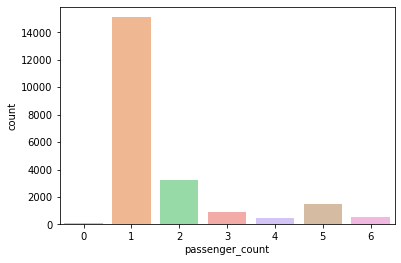

In [123]:
sns.countplot(x="passenger_count",data=df,palette="pastel")

The number of taxi bookings happened in each month?

We see that the Taxi booking has occured highest in May Month and lowest in August Month over all years.

pickup_datetime
1     1898
2     1850
3     1985
4     2032
5     2130
6     1969
7     1557
8     1521
9     1702
10    1817
11    1587
12    1685
dtype: int64


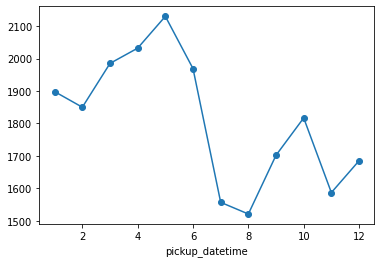

In [124]:
print(df.groupby(df["pickup_datetime"].dt.month).size())
df.groupby(df["pickup_datetime"].dt.month).size().plot(marker="o")

The number of taxi booking happened in each Year?

We see that the Taxi booking has decreased dreastically for year 2015 as compared to year 2009.

pickup_datetime
2009    3364
2010    3207
2011    3532
2012    3520
2013    3349
2014    3218
2015    1543
dtype: int64


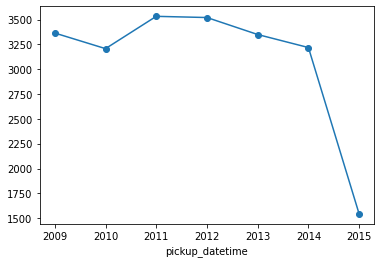

In [125]:
print(df.groupby(df["pickup_datetime"].dt.year).size())
df.groupby(df["pickup_datetime"].dt.year).size().plot(marker="o")

Average fare amount based on Number of Passengers

We observe that average fare is lowest when number of passengers is 5

passenger_count
0     9.110127
1    11.221813
2    11.752135
3    11.428200
4    11.701211
5    11.077106
6    11.468644
Name: fare_amount, dtype: float64


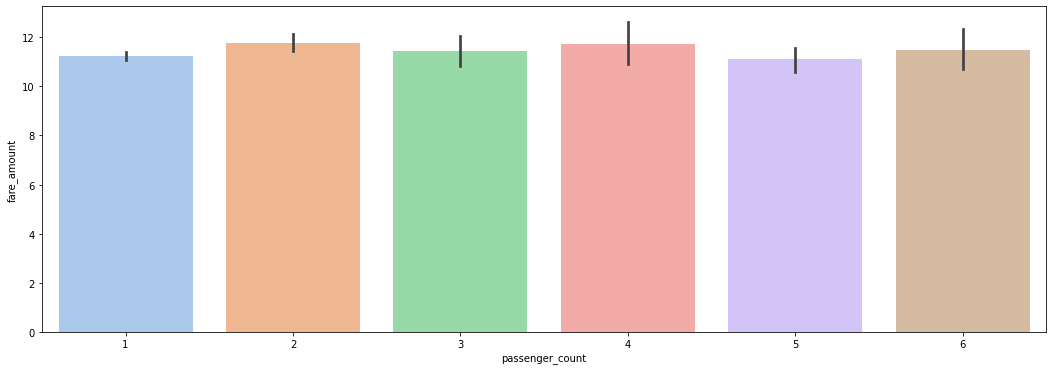

In [126]:
fig=plt.figure(figsize=(18,6))
print(df.groupby("passenger_count")["fare_amount"].mean())

# plotting graph when rows here number of passengers is equal to zero is removed
sns.barplot(x="passenger_count",y="fare_amount",data=df.drop(df[df.passenger_count==0].index),palette="pastel")

Finding relationship between Distance (Pickup and Dropoff) and Fare_amount

We can see as the distnace between two points increases, the fare is also getting incraesed

[(0.0, 150.0)]

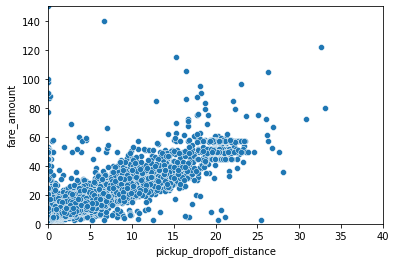

In [127]:
g=sns.scatterplot(x="pickup_dropoff_distance",y="fare_amount",data=df)
g.set(xlim=(0, 40))
g.set(ylim=(0, 150))

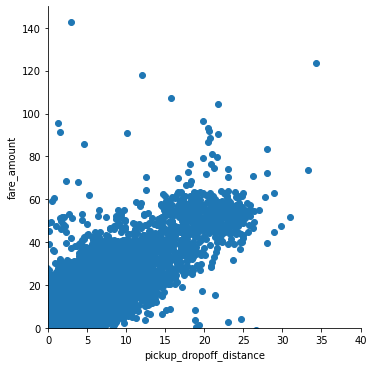

In [128]:
g=sns.lmplot(x="pickup_dropoff_distance",y="fare_amount",data=df,fit_reg=False,  # do not fit a regression line
            x_jitter=5,  # could also dynamically set this with range of data
            y_jitter=6,
            scatter_kws={'alpha': 1})
g.set(xlim=(0, 40))
g.set(ylim=(0, 150))